In [5]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [6]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/Image_Processing/img/'

# Install OpenCV
```
pip install opencv-python
```

# [Image Processing](https://www.geeksforgeeks.org/opencv-python-tutorial/?ref=lbp)

## Read Image

In [7]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

plt.ion();

- 컬러 이미지 읽기

In [8]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR) # image read 
print(f'{image_BGR.shape}')
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB) # bgr to rgb 

(471, 589, 3)


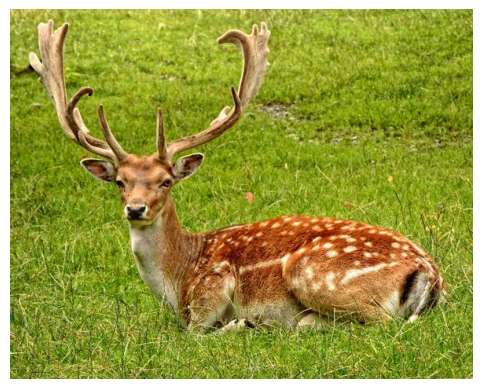

In [9]:
plt.imshow(img_RGB)
plt.axis('off')
plt.show()

- 흑백 이미지 읽기 

In [10]:
image_gray = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_GRAYSCALE)
print(f'{image_gray.shape}')

(471, 589)


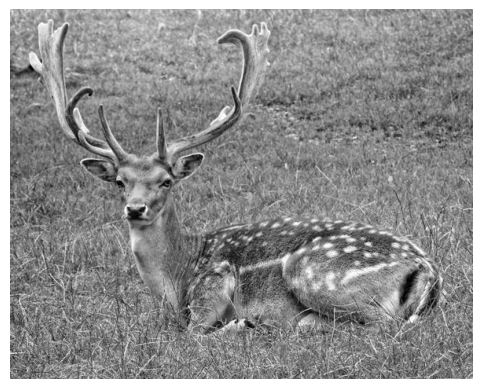

In [11]:
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

## Saving on Image

In [12]:
cv2.imwrite(args.default_path+"deer_gray.jpg", image_gray)

True

저장한 이미지 읽기 

(471, 589)


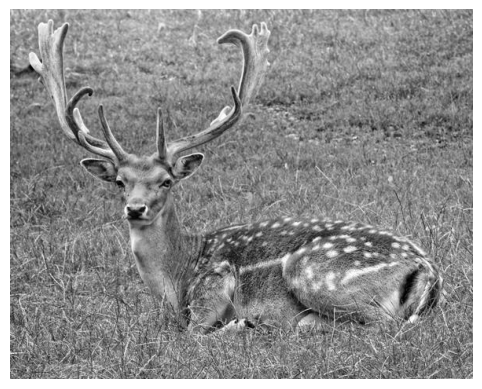

In [13]:
# 파일 읽기
image_gray = cv2.imread(args.default_path+"deer_gray.jpg", cv2.IMREAD_GRAYSCALE)
# 파일(데이터) 모양 확인 
print(f'{image_gray.shape}')
# 이미지 그리기
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

## Resizing

In [14]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

In [15]:
height, width = img_RGB.shape[:2]
height, width

(471, 589)

img_resize: (117, 147, 3) / img_RGB: (471, 589, 3)


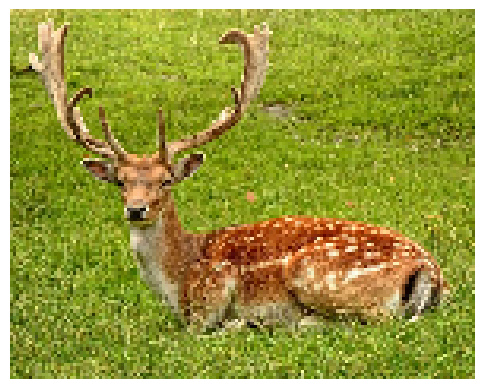

In [16]:
img_resize = cv2.resize(img_RGB, (int(width / 4), int(height / 4)), interpolation = cv2.INTER_CUBIC)
print(f'img_resize: {img_resize.shape} / img_RGB: {img_RGB.shape}')

plt.imshow(img_resize)
plt.axis('off')
plt.show()

## Cropping

In [17]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
height, width = img_RGB.shape[:2]
height, width

(471, 589)

cropped_image: (200, 180, 3) / img_RGB: (471, 589, 3)


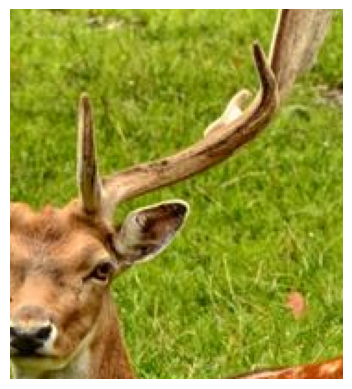

In [18]:
# Cropping an image
cropped_image = img_RGB[80:280, 150:330]

print(f'cropped_image: {cropped_image.shape} / img_RGB: {img_RGB.shape}')
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

## Rotating

In [19]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

In [20]:
height, width = img_RGB.shape[:2]
center = (width/2, height/2)
center

(294.5, 235.5)

rotated_image: (471, 589, 3) / img_RGB: (471, 589, 3)


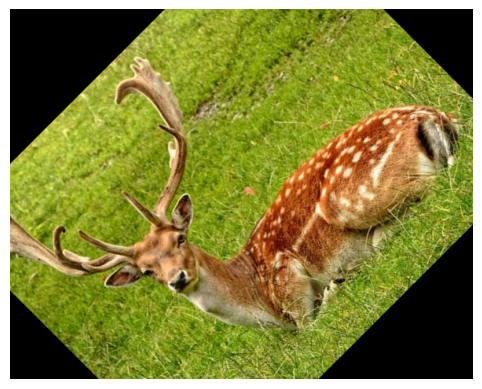

In [21]:
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img_RGB, M=rotate_matrix, dsize=(width, height))

print(f'rotated_image: {rotated_image.shape} / img_RGB: {img_RGB.shape}')
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

## [Thresholding](https://blog.naver.com/samsjang/220504782549)

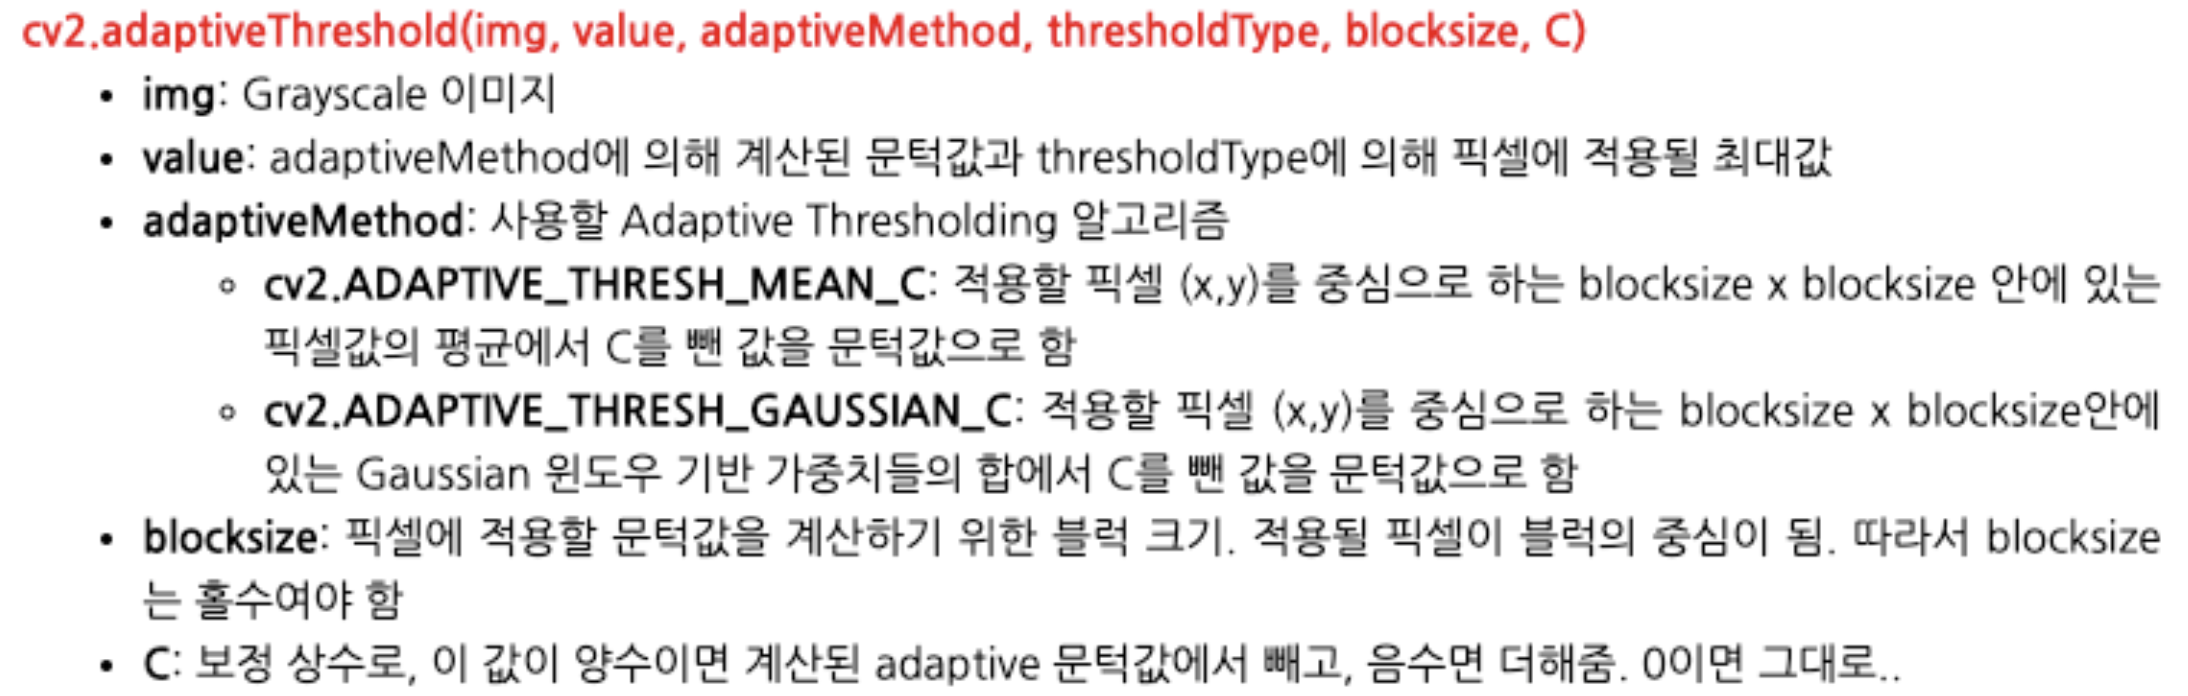

아래 4개 이미지에서 왼쪽 상단은 원본 이미지, 아래쪽 이미지 2개는 adaptiveThreshold를 적용한 이미지이다.

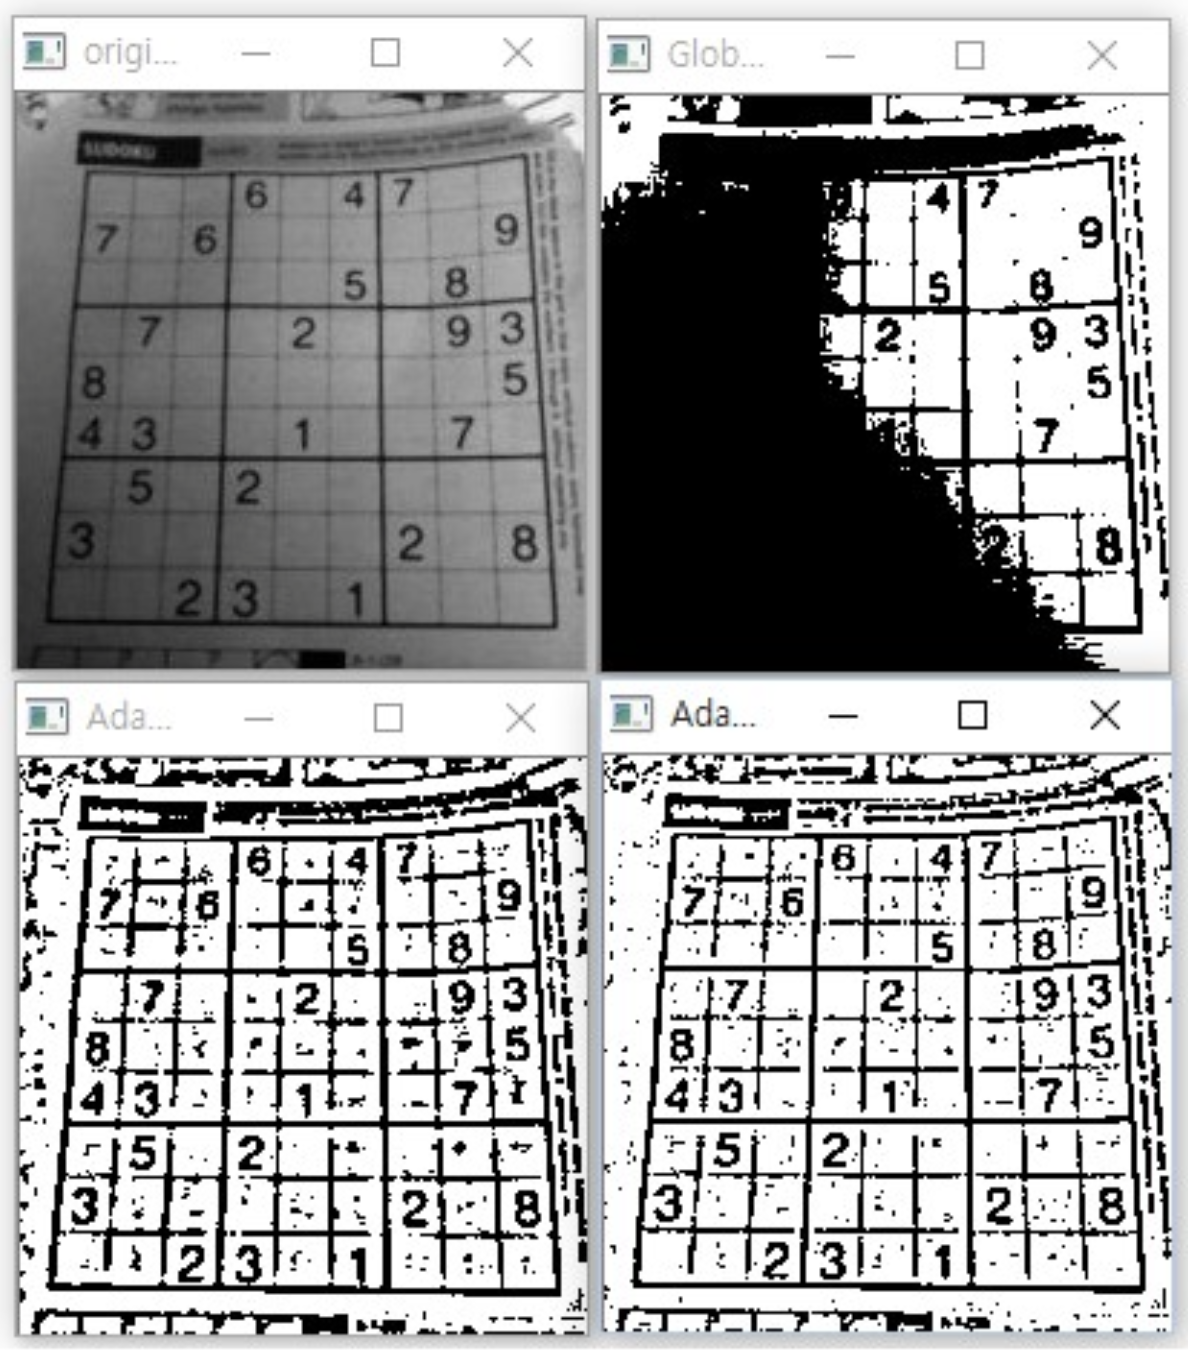

In [22]:
image_gray = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_GRAYSCALE)

ADAPTIVE_THRESH_MEAN_C

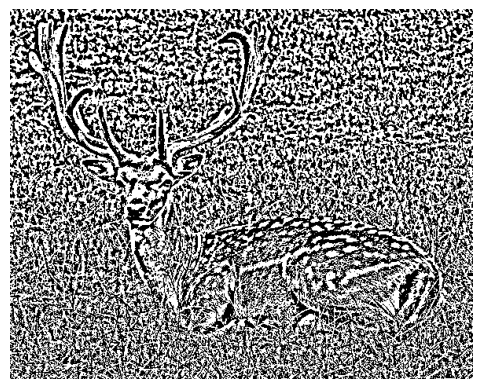

In [23]:
image_thr1 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(image_thr1, cmap='gray')
plt.axis('off')
plt.show()

ADAPTIVE_THRESH_GAUSSIAN_C

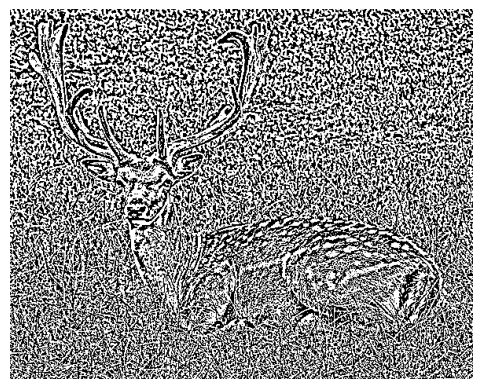

In [24]:
image_thr2 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(image_thr2, cmap='gray')
plt.axis('off')
plt.show()

## [Bluring](https://blog.naver.com/samsjang/220505080672)

In [25]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

Blur
> cv2.blur(img, (val, val))
> - (val, val): 필터 커널 사이즈, 두 값이 달라도 무관

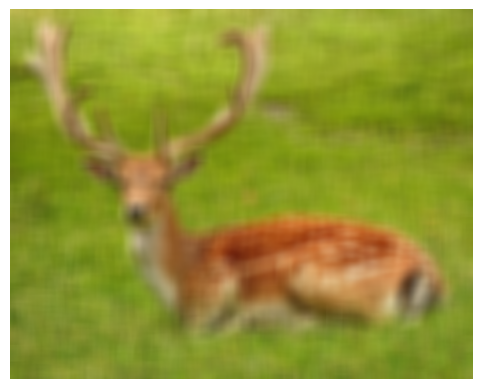

In [26]:
val = 21

img_blur = cv2.blur(img_RGB, (val, val))
plt.imshow(img_blur)
plt.axis('off')
plt.show()

GaussianBlur
> cv2.GaussianBlur(img, (val, val), 0)
> - val: 양의 홀수이어야 함

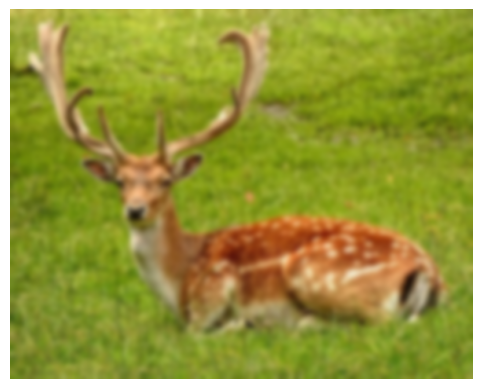

In [27]:
val = 21

img_blur = cv2.GaussianBlur(img_RGB, (val, val), 0)
plt.imshow(img_blur)
plt.axis('off')
plt.show()

medianBlur
> cv2.medianBlur(img, val)
> - val x val 크기의 박스내에 있는 모든 픽셀들의 median 값을 취해서 중앙에 있는 픽셀에 적용 

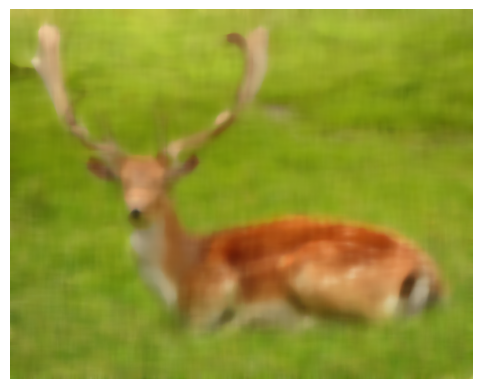

In [28]:
val = 21

img_blur = cv2.medianBlur(img_RGB, val)
plt.imshow(img_blur)
plt.axis('off')
plt.show()

## [Erosion, Dilation](https://blog.naver.com/samsjang/220505815055)
- Erosion: 이미지 침식 
- Dilation: 이미지 팽창

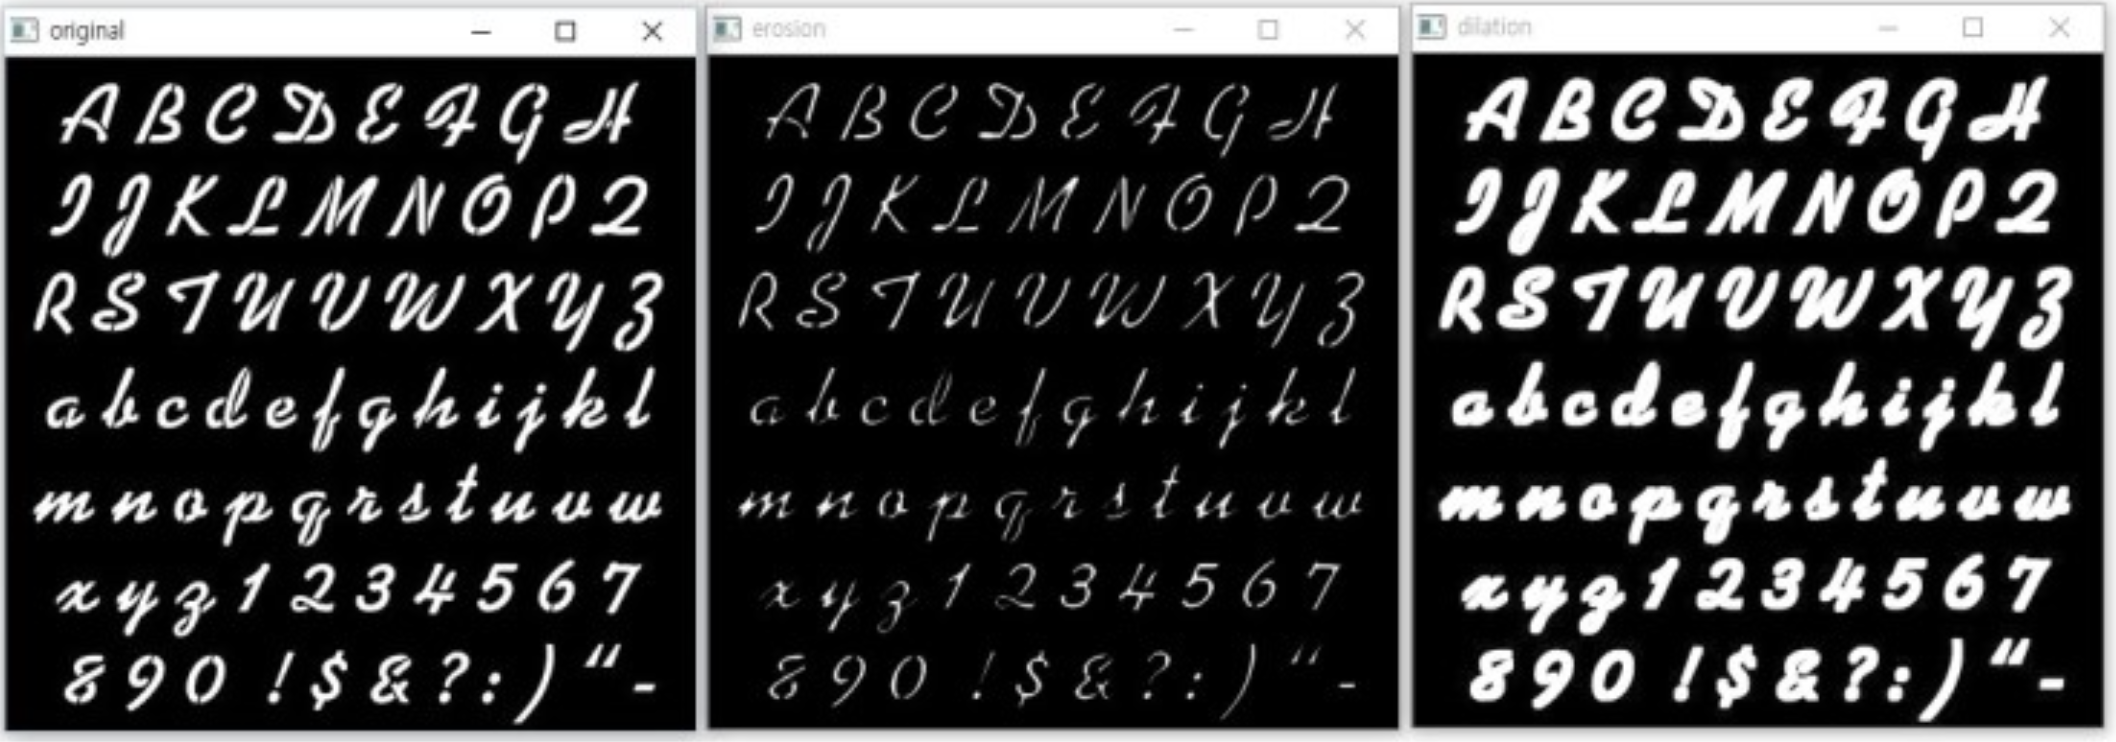

In [29]:
image_gray = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_GRAYSCALE)

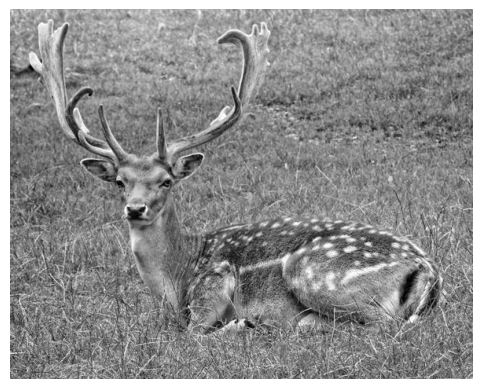

In [30]:
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

Erosion, Dilation에 사용할 커널 생성

In [31]:
kernel = np.ones((3,3), np.uint8)

### Erosion
> cv2.erode(img, kernel, iterations=1)
> - iterations: Erosion 반복 횟수

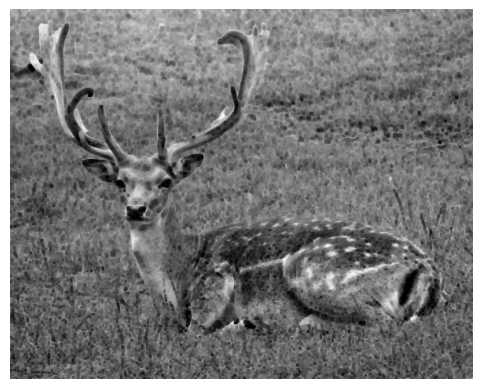

In [32]:
image_erosion = cv2.erode(image_gray, kernel, iterations=1)
plt.imshow(image_erosion, cmap='gray')
plt.axis('off')
plt.show()

### Dilation
> cv2.dilate(img, kernel, iterations=1)
> - iterations: Erosion 반복 횟수

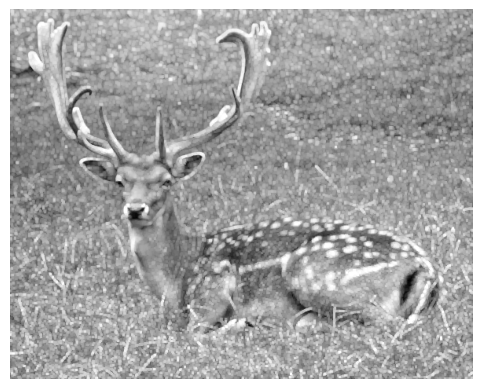

In [33]:
image_dilate = cv2.dilate(image_gray, kernel, iterations=1)
plt.imshow(image_dilate, cmap='gray')
plt.axis('off')
plt.show()

## [Edge](https://blog.naver.com/samsjang/220507996391)

> cv2.Canny(img, minimum thresholding value, maximum thresholding value)

In [34]:
image_gray = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_GRAYSCALE)

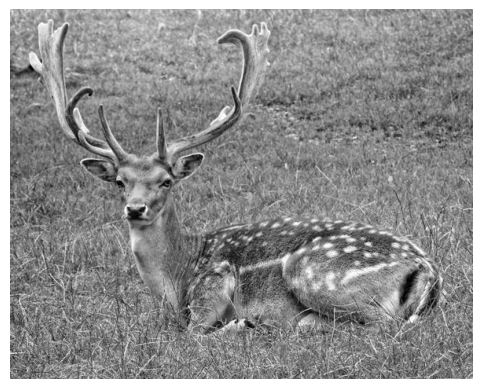

In [35]:
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

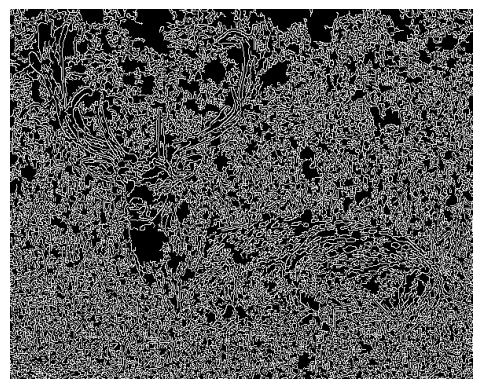

In [36]:
image_edge1 = cv2.Canny(image_gray, 50, 300)
plt.imshow(image_edge1, cmap='gray')
plt.axis('off')
plt.show()

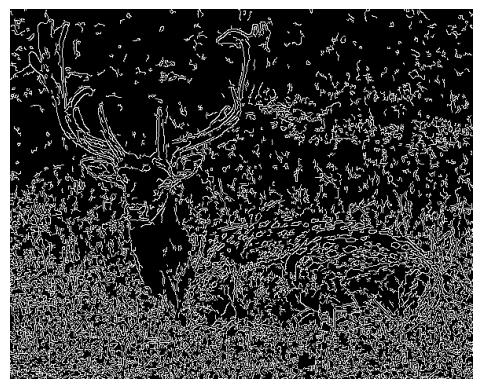

In [37]:
image_edge2 = cv2.Canny(image_gray, 150, 300)
plt.imshow(image_edge2, cmap='gray')
plt.axis('off')
plt.show()

### 가우시안 필터 적용
이미지에서 노이즈가 있으면 엣지를 제대로 찾는 것이 어려울 수 있습니다.     
따라서 `처음에는 5x5 가우시안 필터를 이용해 이미지의 노이즈를 줄여주고, Edge를 사용합니다.`

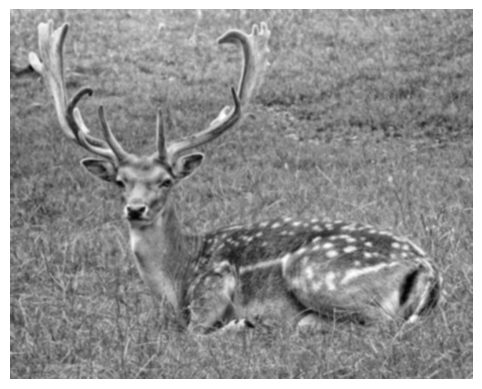

In [38]:
val = 5

image_gray_blur = cv2.GaussianBlur(image_gray, (val, val), 0)

plt.imshow(image_gray_blur, cmap='gray')
plt.axis('off')
plt.show()

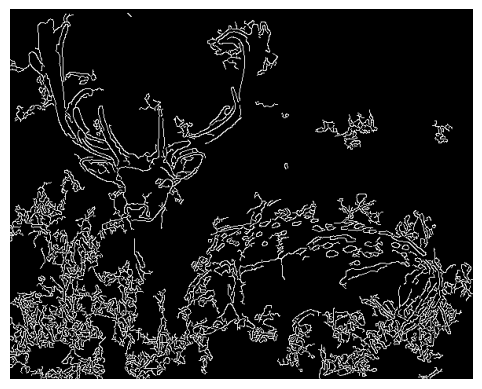

In [39]:
image_edge1 = cv2.Canny(image_gray_blur, 50, 300)
plt.imshow(image_edge1, cmap='gray')
plt.axis('off')
plt.show()

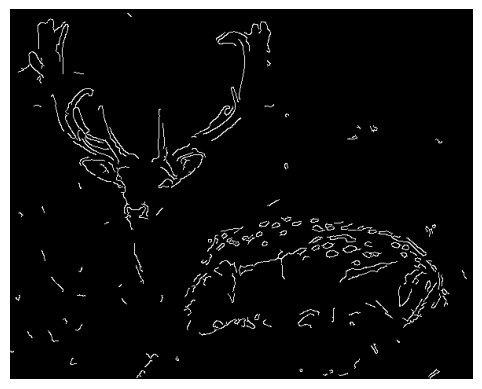

In [40]:
image_edge2 = cv2.Canny(image_gray_blur, 150, 300)
plt.imshow(image_edge2, cmap='gray')
plt.axis('off')
plt.show()